# Introduction to Random Forest

In [101]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [102]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [103]:
df = pd.DataFrame(X,columns = ['col1','col2','col3','col4','col5'])
df['target'] = y

In [104]:
df.head()

,col1,col2,col3,col4,col5,target
0,2.008976,-0.914508,0.611244,0.611260,0.231115,0
1,-1.689003,-0.804663,-0.570679,-0.190413,-1.106977,1
2,1.634521,0.120680,0.418659,-0.748029,-1.084604,0
3,0.908659,-1.331376,1.934140,1.986348,2.232331,0
4,1.638562,-2.403545,6.244338,-1.708575,2.675330,0


In [105]:
df.shape

(100, 6)

In [106]:
# function for row sampling
def sample_row(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [107]:
# function for feature sampling

def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [139]:
# function for combined sampling
def combined_sampling(df,row_percent, col_percent):
    new_df = sample_row(df,row_percent)
    return sample_features(new_df,col_percent)

### For row sampling

In [109]:
df1 = sample_row(df,0.2)

In [110]:
df2 = sample_row(df,0.2)

In [111]:
df3 = sample_row(df,0.2)

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [114]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [115]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[2] <= 0.183\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[4] <= -0.767\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

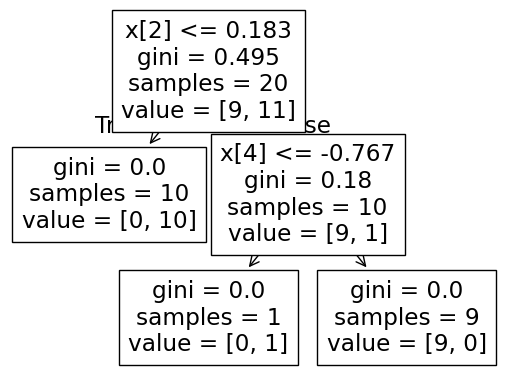

In [116]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[0] <= -0.227\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.625, 0.5, '  False')]

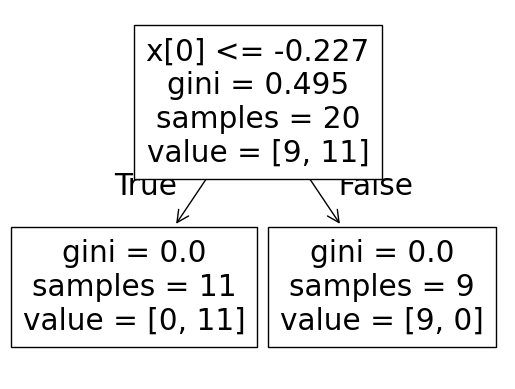

In [117]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[4] <= -0.4\ngini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(0.4, 0.5, 'x[1] <= -2.665\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

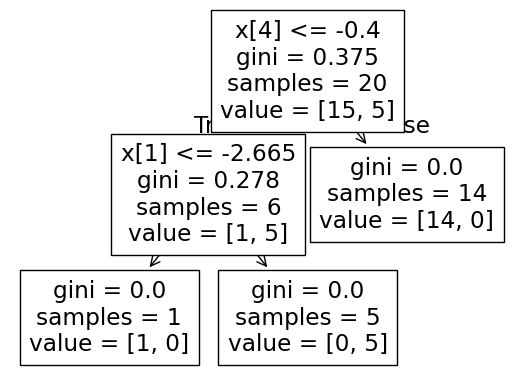

In [118]:
plot_tree(clf3)

In [119]:
df.head(3)

,col1,col2,col3,col4,col5,target
0,2.008976,-0.914508,0.611244,0.611260,0.231115,0
1,-1.689003,-0.804663,-0.570679,-0.190413,-1.106977,1
2,1.634521,0.120680,0.418659,-0.748029,-1.084604,0


In [120]:
clf1.predict(np.array([-0.655837,	-1.564531,	-0.858783,	0.038087,	1.096643]).reshape(1,5))	

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [121]:
clf2.predict(np.array([-0.655837,	-1.564531,	-0.858783,	0.038087,	1.096643]).reshape(1,5))

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [122]:
clf3.predict(np.array([-0.655837,	-1.564531,	-0.858783,	0.038087,	1.096643]).reshape(1,5))

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### For column sampling

In [123]:
df4 = sample_features(df,0.8)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9392\1158166936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [124]:
df5 = sample_features(df,0.8)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9392\1158166936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [125]:
df6 = sample_features(df,0.8)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9392\1158166936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [126]:
df6.head(3)

,col3,col5,col2,col1,target
0,0.611244,0.231115,-0.914508,2.008976,0
1,-0.570679,-1.106977,-0.804663,-1.689003,1
2,0.418659,-1.084604,0.120680,1.634521,0


In [127]:
df6.shape

(100, 5)

In [128]:
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [130]:
clf4.fit(df4.iloc[:,0:4],df4.iloc[:,-1])
clf5.fit(df5.iloc[:,0:4],df5.iloc[:,-1])
clf6.fit(df6.iloc[:,0:4],df6.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[0] <= -0.399\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.75, 'x[0] <= -0.665\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.3, 0.5833333333333334, 'x[1] <= -0.956\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.75, 'x[3] <= -1.81\ngini = 0.331\nsamples = 62\nvalue = [49, 13]'),
 Text(0.65, 0.8333333333333333, '  False'),
 Text(0.7, 0.5833333333333334, 'x[2] <= 0.954\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.6, 0.4166666666666667, 'x[2] <= -0.815\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.7, 0.25, 'x[2] <= -0.659\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(

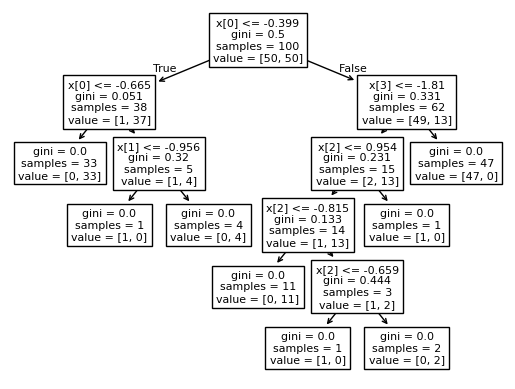

In [131]:
plot_tree(clf4)

[Text(0.5, 0.9166666666666666, 'x[1] <= -0.399\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.75, 'x[1] <= -0.665\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.3, 0.5833333333333334, 'x[2] <= -0.956\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.75, 'x[0] <= -1.81\ngini = 0.331\nsamples = 62\nvalue = [49, 13]'),
 Text(0.65, 0.8333333333333333, '  False'),
 Text(0.7, 0.5833333333333334, 'x[3] <= 0.954\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.6, 0.4166666666666667, 'x[3] <= -0.815\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.7, 0.25, 'x[3] <= -0.659\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(

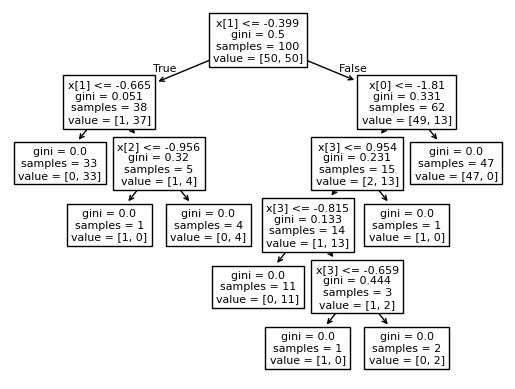

In [132]:
plot_tree(clf5)

[Text(0.45454545454545453, 0.9166666666666666, 'x[3] <= -0.399\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.18181818181818182, 0.75, 'x[2] <= 0.243\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.3181818181818182, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.2727272727272727, 0.5833333333333334, 'x[2] <= 0.317\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7272727272727273, 0.75, 'x[1] <= -0.423\ngini = 0.331\nsamples = 62\nvalue = [49, 13]'),
 Text(0.5909090909090909, 0.8333333333333333, '  False'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[3] <= -0.241\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.5454545454545454, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),

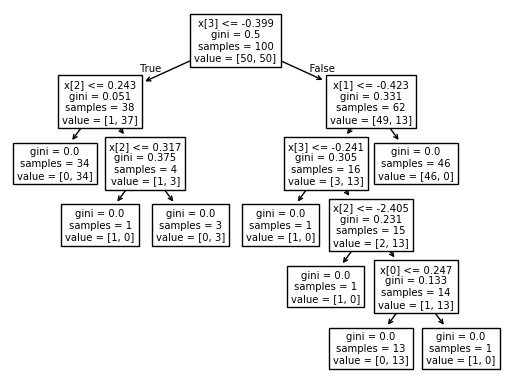

In [133]:
plot_tree(clf6)

In [134]:
df4.head(1)

,col1,col3,col5,col4,target
0,2.008976,0.611244,0.231115,0.61126,0


In [135]:
clf4.predict(np.array([2.008976,	0.611244,	0.231115,	0.61126]).reshape(1,4))	

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [136]:
clf5.predict(np.array([2.008976,	0.611244,	0.231115,	0.61126]).reshape(1,4))	

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [137]:
clf6.predict(np.array([2.008976,	0.611244,	0.231115,	0.61126]).reshape(1,4))	

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### For combined sampling

In [141]:
df7 =combined_sampling(df,0.5,0.5)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9392\1158166936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [143]:
df8 = combined_sampling(df,0.5,0.5)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9392\1158166936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [144]:
df9 = combined_sampling(df,0.5,0.5)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9392\1158166936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [145]:
df9.head()

,col1,col3,target
75,0.900072,3.753037,0
70,-0.018056,0.075809,1
34,0.060598,2.643751,0
6,1.394339,-2.660649,1
67,0.457959,-1.293789,0


In [146]:
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()

In [147]:
clf7.fit(df7.iloc[:,0:2],df7.iloc[:,-1])
clf8.fit(df8.iloc[:,0:2],df8.iloc[:,-1])
clf9.fit(df9.iloc[:,0:2],df9.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.074\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= -1.066\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]')]

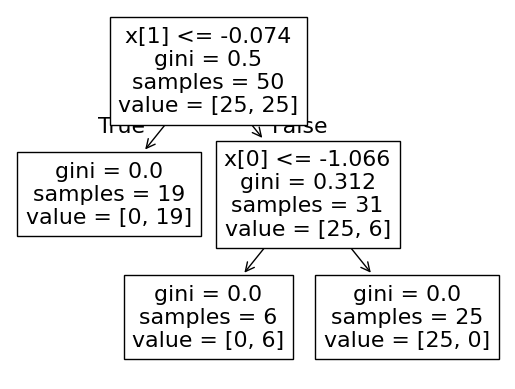

In [148]:
plot_tree(clf7)

[Text(0.5384615384615384, 0.9444444444444444, 'x[0] <= -0.527\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.46153846153846156, 0.8333333333333334, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.5, 0.8888888888888888, 'True  '),
 Text(0.6153846153846154, 0.8333333333333334, 'x[1] <= -0.623\ngini = 0.389\nsamples = 34\nvalue = [25, 9]'),
 Text(0.5769230769230769, 0.8888888888888888, '  False'),
 Text(0.46153846153846156, 0.7222222222222222, 'x[0] <= 1.324\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.38461538461538464, 0.6111111111111112, 'x[0] <= 1.308\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.3076923076923077, 0.5, 'x[0] <= 0.464\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.23076923076923078, 0.3888888888888889, 'x[0] <= 0.314\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.15384615384615385, 0.2777777777777778, 'x[0] <= -0.014\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.07692307692307693, 0.16666666666666666, 'gini = 0.0

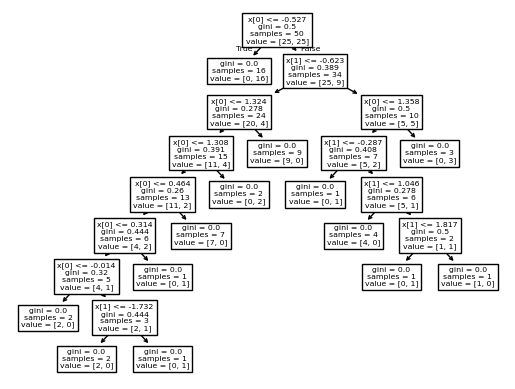

In [149]:
plot_tree(clf8)

[Text(0.625, 0.9, 'x[0] <= 0.021\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.4166666666666667, 0.7, 'x[1] <= 0.153\ngini = 0.204\nsamples = 26\nvalue = [3, 23]'),
 Text(0.5208333333333334, 0.8, 'True  '),
 Text(0.25, 0.5, 'x[1] <= -0.923\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.16666666666666666, 0.3, 'x[0] <= -0.909\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.5833333333333334, 0.5, 'x[0] <= -1.193\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.7, 'x[1] <= -2.334\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.7291666666666667, 0.8, '  False'),
 Text(0.75, 0.5, 'gini = 0.

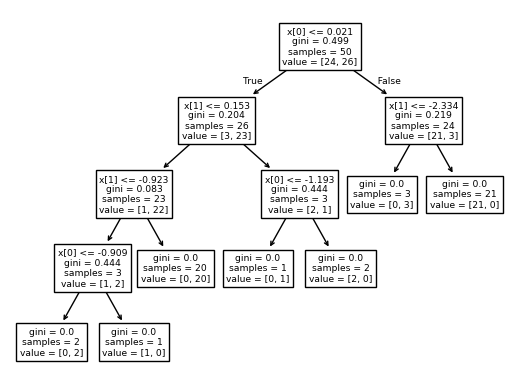

In [150]:
plot_tree(clf9)

In [151]:
df7.head(1)

,col3,col1,target
85,-0.470721,-0.704319,1


In [152]:
clf7.predict(np.array([-0.470721,	-0.704319]).reshape(1,2))	

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [153]:
clf8.predict(np.array([-0.470721,	-0.704319]).reshape(1,2))	

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [154]:
clf9.predict(np.array([-0.470721,	-0.704319]).reshape(1,2))	

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])